V1: Я потребляю леденцы, чтобы освежить дыхание

V2: Я потребляю леденцы, чтобы чувствовать себя увереннее

V3: Я потребляю леденцы, чтобы освежить полость рта

V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту

V5: Я потребляю леденцы как заменитель других кондитерских изделий

V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого

V7: Леденцы помогают мне сконцентрироваться

V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать

V9: Я потребляю леденцы для того, чтобы облегчить боль в горле

V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа

V11: Я потребляю леденцы для улучшения самочувствия

По смыслу можно ожидать 4 кластера:
- V1-V4 - используют леденцы, чтобы освежиться
- V5-V6 - как сладкое
- V7-V8 - для управления вниманием
- V9-V11 - для улучшения самочувствия

In [142]:
import pandas as pd

data = pd.read_csv(
    '/Users/dima-utyuz/data_analytics/data_analysis/Задачи для лабораторной 1-3/‡ ¤ ç¨ ¤«ï « ¡®à â®à­®© 1-3/§ ¤ ç _1_«¥¤¥­æë/‹¥¤¥­æë.dat',
    delimiter=';',
)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [143]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Иерархический кластерный анализ

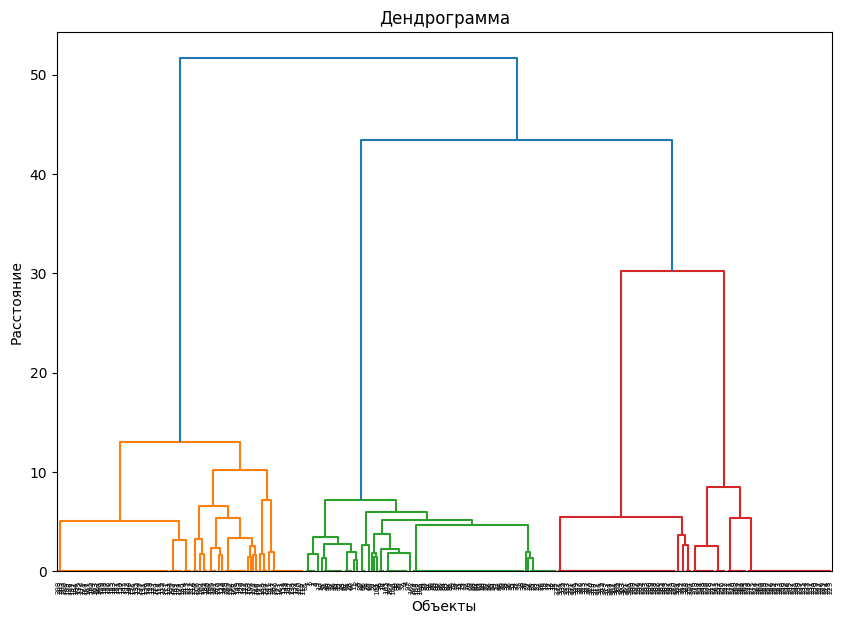

In [144]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()


In [145]:
from scipy.cluster.hierarchy import fcluster

k = 4
ierarh_clusters = fcluster(Z, k, criterion='maxclust')

In [146]:
ierarh_data = data.copy()
ierarh_data['cluster'] = ierarh_clusters

print(ierarh_data.groupby('cluster').size())

print(ierarh_data.groupby('cluster').mean())

cluster
1    108
2    110
3     59
4     61
dtype: int64
               V1        V2        V3        V4        V5        V6        V7  \
cluster                                                                         
1        2.824074  2.833333  2.768519  2.620370  2.611111  2.583333  2.750000   
2        4.845455  4.800000  4.836364  4.681818  3.036364  3.036364  3.000000   
3        3.000000  2.966102  2.966102  2.915254  2.915254  2.949153  4.915254   
4        3.000000  3.000000  3.000000  3.000000  4.852459  4.852459  3.000000   

               V8        V9       V10       V11  
cluster                                          
1        2.916667  4.953704  4.814815  4.861111  
2        2.990909  3.072727  3.045455  3.045455  
3        4.915254  3.000000  3.000000  3.000000  
4        2.918033  2.754098  2.754098  2.754098  


In [147]:
from sklearn import metrics

print(metrics.silhouette_score(data, ierarh_clusters))

0.7265095702205504


Получилось выделить 4 кластера. В ожидаемых ответах среднее в показательных ответах выше 4.68 и даже выше 4.8 кроме V4. Средний ответ менее 3 в пунктах, которые не выделяют выборку 

# Кластерный анализ методом к-средних (k-means)

Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму квадратов расстояний от каждой точки данных до центра ближайшего к ней кластера. Кластеризацию будем считать условно хорошей, если инерция перестаёт сильно уменьшаться при увеличении числа кластеров

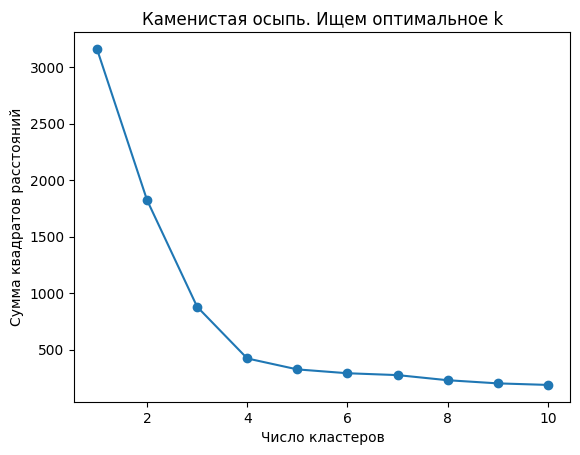

In [148]:
from sklearn.cluster import KMeans

K = range(1, 11)

models = [KMeans(n_clusters=k, random_state=42).fit(data) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()


In [149]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)
kmeans_clusters = kmeans.labels_

In [150]:
kmeans_data = data.copy()
kmeans_data['cluster'] = kmeans_clusters

print(kmeans_data.groupby('cluster').size())

print(kmeans_data.groupby('cluster').mean())

cluster
0    108
1     61
2    110
3     59
dtype: int64
               V1        V2        V3        V4        V5        V6        V7  \
cluster                                                                         
0        2.824074  2.833333  2.768519  2.620370  2.611111  2.583333  2.750000   
1        3.000000  3.000000  3.000000  3.000000  4.852459  4.852459  3.000000   
2        4.845455  4.800000  4.836364  4.681818  3.036364  3.036364  3.000000   
3        3.000000  2.966102  2.966102  2.915254  2.915254  2.949153  4.915254   

               V8        V9       V10       V11  
cluster                                          
0        2.916667  4.953704  4.814815  4.861111  
1        2.918033  2.754098  2.754098  2.754098  
2        2.990909  3.072727  3.045455  3.045455  
3        4.915254  3.000000  3.000000  3.000000  


In [151]:
print(metrics.silhouette_score(data, kmeans_clusters))

0.7265095702205504


Результаты получились те же самые, 4 явно выделяемых кластера

# Кластерный анализ методом DBSCAN

In [152]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.9, min_samples=5)
dbscan.fit(data)
dbscan_clusters = dbscan.labels_


In [153]:
dbscan_data = data.copy()
dbscan_data['cluster'] = dbscan_clusters

print(dbscan_data.groupby('cluster').size())

print(dbscan_data.groupby('cluster').mean())

cluster
-1      6
 0    110
 1    104
 2     61
 3     57
dtype: int64
               V1        V2        V3        V4        V5        V6        V7  \
cluster                                                                         
-1       2.333333  3.333333  3.333333  3.333333  2.000000  2.333333  3.000000   
 0       4.845455  4.800000  4.836364  4.681818  3.036364  3.036364  3.000000   
 1       2.855769  2.788462  2.721154  2.567308  2.634615  2.605769  2.778846   
 2       3.000000  3.000000  3.000000  3.000000  4.852459  4.852459  3.000000   
 3       3.000000  3.000000  3.000000  2.947368  2.947368  2.947368  4.912281   

               V8        V9       V10       V11  
cluster                                          
-1       3.666667  4.333333  4.166667  4.166667  
 0       2.990909  3.072727  3.045455  3.045455  
 1       2.913462  4.951923  4.817308  4.865385  
 2       2.918033  2.754098  2.754098  2.754098  
 3       4.912281  3.000000  3.000000  3.000000  


In [154]:
print(metrics.silhouette_score(data, dbscan_clusters))

0.6932361807248247


In [155]:
dbscan_data[dbscan_data['cluster'] == -1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster
112,2,4,4,4,2,2,2,3,5,5,5,-1
139,2,4,4,4,2,2,2,3,5,5,5,-1
177,2,4,4,4,2,2,2,3,5,4,4,-1
188,2,4,4,4,2,2,2,3,5,5,5,-1
308,3,2,2,2,2,3,5,5,3,3,3,-1
324,3,2,2,2,2,3,5,5,3,3,3,-1


В лучшей версии dbscan получилось выделить 4 кластера и 6 шумовых точек

## Сравнение методов

In [156]:
from sklearn.metrics import adjusted_rand_score

df = pd.DataFrame({
    'ierarh': ierarh_clusters,
    'kmeans': kmeans_clusters,
    'dbscan': dbscan_clusters,
})


In [157]:
contingency_table = pd.crosstab(df['kmeans'], df['ierarh'])
print(contingency_table)

ari = adjusted_rand_score(kmeans_clusters, ierarh_clusters)
print(f'Adjusted Rand Index: {ari}')

ierarh    1    2   3   4
kmeans                  
0       108    0   0   0
1         0    0   0  61
2         0  110   0   0
3         0    0  59   0
Adjusted Rand Index: 1.0


In [158]:
contingency_table = pd.crosstab(df['dbscan'], df['ierarh'])
print(contingency_table)

ari = adjusted_rand_score(ierarh_clusters, dbscan_clusters)
print(f'Adjusted Rand Index: {ari}')

ierarh    1    2   3   4
dbscan                  
-1        4    0   2   0
 0        0  110   0   0
 1      104    0   0   0
 2        0    0   0  61
 3        0    0  57   0
Adjusted Rand Index: 0.9757123834634349


In [159]:
contingency_table = pd.crosstab(df['kmeans'], df['dbscan'])
print(contingency_table)

ari = adjusted_rand_score(kmeans_clusters, dbscan_clusters)
print(f'Adjusted Rand Index: {ari}')

dbscan  -1    0    1   2   3
kmeans                      
0        4    0  104   0   0
1        0    0    0  61   0
2        0  110    0   0   0
3        2    0    0   0  57
Adjusted Rand Index: 0.9757123834634349


Выводы: иерархический и kmeans методы показали совершенно одинаковые результаты, dbscan оказался выделил 6 шумных точек, а в остальном показал те же результаты